In [86]:
from webscraper.scrap_modules import my_NLP as myNLP 
import pickle
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test Code - NLP

load cleaned dataframe

In [87]:
with open("webscraper/cleaned_data/cleaned_dataframe.pkl", "rb") as file:
    df = pickle.load(file)
    

In [88]:
df.head(2)

,id,title,company,city,posting_date,job_description,seniority_level,employment_type,job_function,industries,scraping_date,url,keyword,language
0,3685669741,Software Engineer Fullstack (m/w/d),Atruvia AG,"Aschheim, Bavaria, Germany",1 day ago,VollzeitWir sind der Digitalisierungspartner d...,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Scientist,de
1,3719620327,Data Analyst - Business Intelligence,Almedia,"Berlin, Berlin, Germany",5 days ago,Almedia helps companies grow by promoting thei...,Mid-Senior level,Full-time,Analyst,"Technology, Information and Internet",2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en


#### Keyword Extraction 
https://www.analyticsvidhya.com/blog/2022/03/keyword-extraction-methods-from-documents-in-nlp/#:~:text=Textrank%20is%20a%20Python%20tool,compatible%20with%20the%20Spacy%20pipeline

In [89]:
import spacy 
import pytextrank 
import pandas as pd
import re

# !spacy download en_core_web_sm
# !spacy download de_core_news_sm

### first cleaning

In [90]:
nlp_df = pd.DataFrame(df) # create a new data frame

In [91]:
nlp_df

,id,title,company,city,posting_date,job_description,seniority_level,employment_type,job_function,industries,scraping_date,url,keyword,language
0,3685669741,Software Engineer Fullstack (m/w/d),Atruvia AG,"Aschheim, Bavaria, Germany",1 day ago,VollzeitWir sind der Digitalisierungspartner d...,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Scientist,de
1,3719620327,Data Analyst - Business Intelligence,Almedia,"Berlin, Berlin, Germany",5 days ago,Almedia helps companies grow by promoting thei...,Mid-Senior level,Full-time,Analyst,"Technology, Information and Internet",2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
2,3720365801,(Junior) Data Engineer (m/f/d),Sandbox Interactive,"Berlin, Berlin, Germany",1 day ago,YOUR GAMEBuild and maintain the current data i...,Mid-Senior level,Full-time,Information Technology,Computer Games,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
3,3672508925,Financial Data Analyst (m/f/d),Ultramarin,"Berlin, Berlin, Germany",2 months ago,About The PositionWe are looking for a top-tie...,Mid-Senior level,Full-time,Information Technology,Financial Services,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
4,3695466781,Business Intelligence Analyst (f/m/d),Les Lunes,"Berlin, Berlin, Germany",4 weeks ago,Your missionAs a Business Intelligence Analyst...,Mid-Senior level,Full-time,"Research, Analyst, and Information Technology",Retail Apparel and Fashion,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22074,3708677238,DevOps Engineer (m/w/d),dynexo GmbH,Germany,3 weeks ago,"dynexo, ein Unternehmen der DISION Technologie...",Mid-Senior level,Full-time,Information Technology,IT Services and IT Consulting,2023-09-25,https://www.linkedin.com/jobs/search?keywords=...,Cloud Computing,de
22075,3726099021,Facility / Utilities Engineer,The PAC Group,"Munich, Bavaria, Germany",3 weeks ago,DescriptionPLEASE SUBMIT CV IN ENGLISH.The PAC...,Entry level,Full-time,Engineering and Information Technology,Facilities Services,2023-09-25,https://www.linkedin.com/jobs/search?keywords=...,Research,en
22076,3717628705,Wissenschaftlicher Mitarbeiter / Postdoc (m/w/d),Universitätsklinikum Schleswig-Holstein,"Kiel, Schleswig-Holstein, Germany",6 days ago,Projekttitel: Resistenzmechanismen bei ALK-pos...,Entry level,Full-time,"Research, Analyst, and Information Technology",Hospitals and Health Care,2023-09-25,https://www.linkedin.com/jobs/search?keywords=...,Statistics,de
22077,3705298823,Head of Support (m/w/d),"Machineseeker Group (Machineseeker, TruckScout...","Essen, North Rhine-Westphalia, Germany",3 weeks ago,"Du hast Lust, zu der Zufriedenheit unserer Kun...",Mid-Senior level,Full-time,Customer Service,IT Services and IT Consulting,2023-09-25,https://www.linkedin.com/jobs/search?keywords=...,Cloud Computing,de


In [92]:


tqdm.pandas(desc="Processing")
nlp_df['cp1_title'] = nlp_df["title"].progress_apply(myNLP.clean_up)

Processing: 100%|██████████| 22079/22079 [00:00<00:00, 146136.15it/s]


remove text in parentheses

In [93]:
pattern_to_extract = r'\((.*?)\)'

# Extract text within parentheses and put it in a new column
nlp_df['text_in_parentheses'] = nlp_df['cp1_title'].progress_apply(lambda x: re.findall(pattern_to_extract, x))

# Convert lists with only one element to that element, and keep lists for multiple elements
nlp_df['text_in_parentheses'] = nlp_df['text_in_parentheses'].progress_apply(lambda x: x[0] if len(x) == 1 else x)

# Remove the text within parentheses 
nlp_df['cp1_title'] = nlp_df['cp1_title'].progress_apply(lambda x: re.sub(pattern_to_extract, '', x).strip())


Processing: 100%|██████████| 22079/22079 [00:00<00:00, 650218.28it/s]


### Tokenize, lemmatize, remove stopwords

In [94]:
nlp_df['cp2_title'] = nlp_df['cp1_title'].progress_apply(myNLP.tokenize)
nlp_df['cp2_title'] = nlp_df['cp2_title'].progress_apply(myNLP.stem_and_lemmatize)
nlp_df['cp2_title'] = nlp_df['cp2_title'].progress_apply(myNLP.remove_stopwords)
nlp_df['cp2_title'] = nlp_df['cp2_title'].progress_apply(myNLP.re_blob) 


Processing: 100%|██████████| 22079/22079 [00:00<00:00, 954347.23it/s]


#### clean dataframe based on several rounds of inspecting word clouds 

combine keywords

In [5]:
nlp_df_clean = pd.DataFrame(nlp_df)

NameError: name 'pd' is not defined

In [100]:
nlp_df_clean['cp2_title'] = nlp_df_clean['cp2_title'].progress_apply(myNLP.combine_keywords)

Processing: 100%|██████████| 22079/22079 [00:00<00:00, 74229.01it/s]


extract new job title with combined keywords

In [ ]:
nlp_df_clean = nlp_df_clean.progress_apply(myNLP.extract_keywords, axis=1)

extract job level information

In [101]:
nlp_df_clean = nlp_df_clean.progress_apply(myNLP.extract_level, axis=1)

Processing: 100%|██████████| 22079/22079 [00:10<00:00, 2203.55it/s]


In [4]:
nlp_df_clean['job_level'].value_counts(dropna=False)

NameError: name 'nlp_df_clean' is not defined

In [ ]:
# # manual selection from wordcloud
# words_to_find = ['hybrid', 'remote', 'medizin','solution architect', 'devops']


# nlp_df_clean['exclude'] = nlp_df_clean['cp1_title'].apply(lambda x: 'True' if any(word.lower() in x.lower() for word in words_to_find) else 'False')


In [ ]:
myNLP.word_cloud(nlp_df_clean, 'cp2_title')

split dataframe

In [ ]:
print(nlp_df_clean.shape)
nlp_df_split = nlp_df_clean[nlp_df_clean['new_job_title']isna()]

print(nlp_df_split.shape)

all_text = nlp_df_split['cp2_title']

total_text = " ".join(all_text) # combining all job title 

#### word cloud 

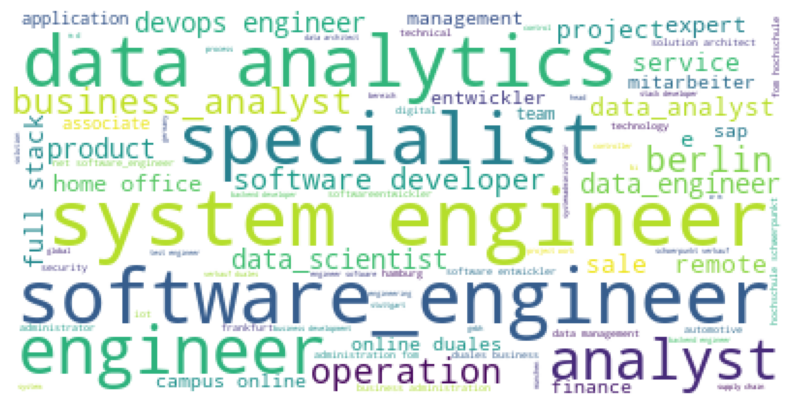

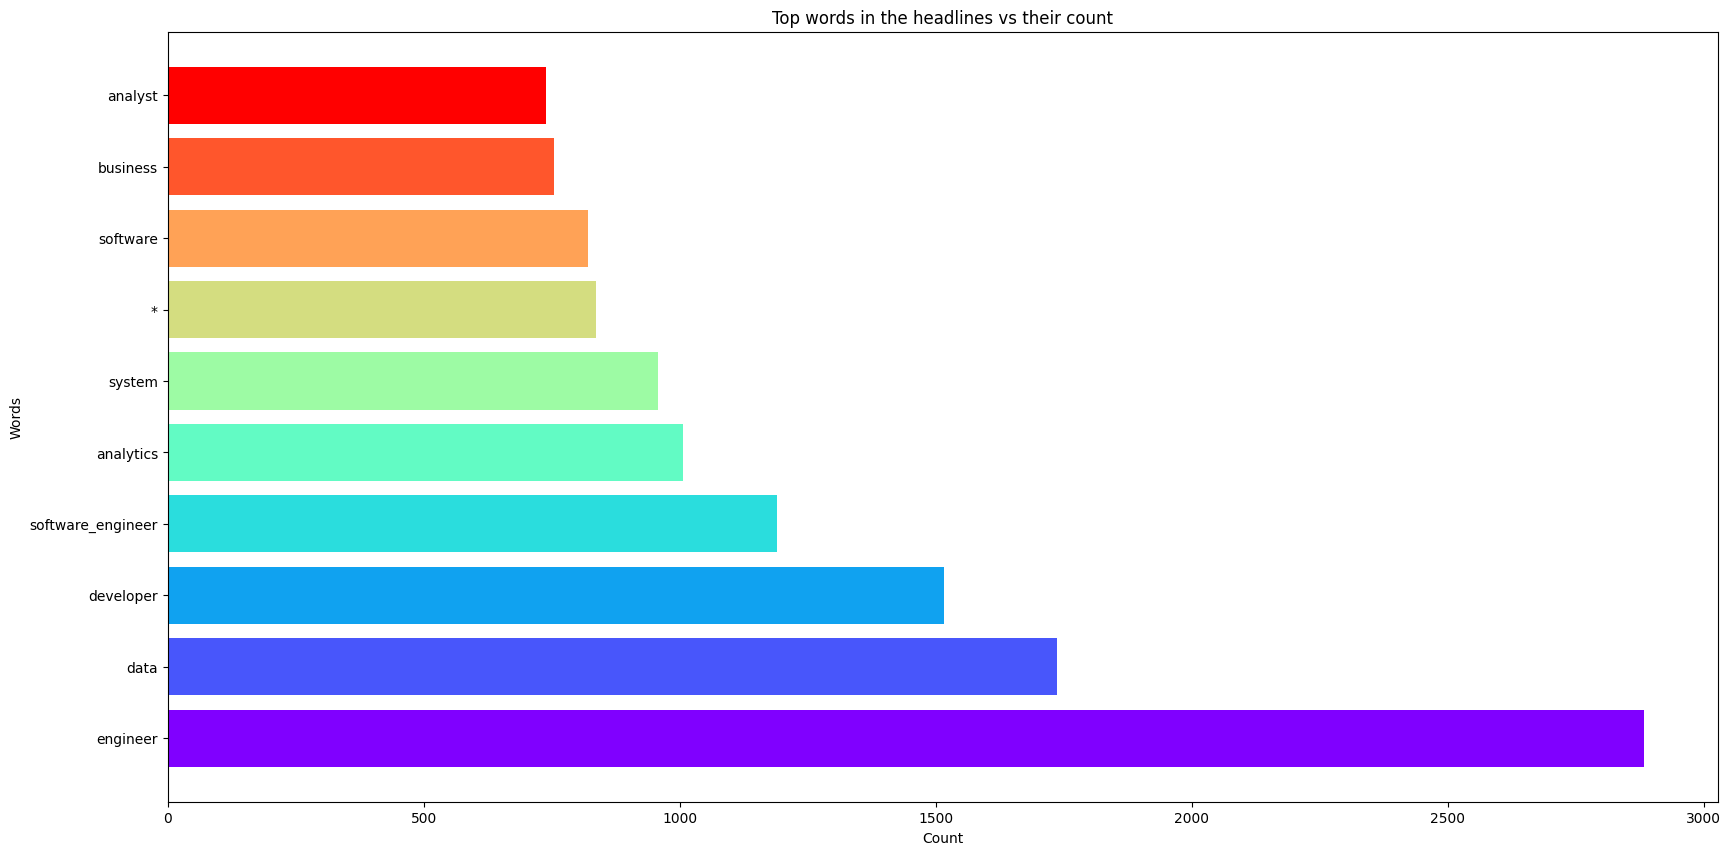

In [108]:
myNLP.word_cloud(nlp_df_split, 'cp2_title')

In [1]:
from keybert import KeyBERT


ModuleNotFoundError: No module named 'keybert'

Yake keyword extractor

In [109]:
import yake

kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(bag)

In [110]:
for kw in keywords:
    print(kw)

('engineer system engineer', 1.688097096183151e-06)
('data analytics data', 4.342800424075731e-06)
('engineer software developer', 4.54562365608944e-06)
('engineer data', 6.4713074419059885e-06)
('engineer devops engineer', 6.582011222871016e-06)
('engineer', 7.555774902325748e-06)
('system engineer', 7.774449268669224e-06)
('engineer software', 8.331558871074656e-06)
('data analytics', 1.044449757725953e-05)
('software developer software', 1.1361538456890929e-05)
('developer software developer', 1.2602113994245976e-05)
('engineer analytics engineer', 1.3403475576994239e-05)
('engineer data analytics', 1.4497507023081154e-05)
('data analytics business', 1.4964157818411698e-05)
('data architect data', 1.5149364972365522e-05)
('software developer', 1.52186103681644e-05)
('system engineer software', 1.5296967195075265e-05)
('data', 1.5474799795740847e-05)
('analytics engineer data', 1.5815462206997624e-05)
('engineer data architect', 1.6198347956198925e-05)


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Data Preprocessing
## Lowercasing

## Tokenization and Removing Stop Words
stop_words = set(stopwords.words('english'))
nlp_df['cp1_title'] = nlp_df['cp1_title'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

## Stemming
stemmer = PorterStemmer()
nlp_df['cp1_title'] = nlp_df['cp1_title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

# Step 2: Text Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(nlp_df['cp1_title'])

# # Step 3: Clustering
# kmeans = KMeans(n_clusters=5)  # Assuming 5 clusters
# kmeans.fit(X)
# nlp_df['cluster_kmeans'] = kmeans.labels_



# Step 4: Evaluation
# Manually evaluate the clusters or use metrics

# Step 5: Visualization (Optional)
# Use Matplotlib or Seaborn to visualize clusters

In [ ]:
# # Elbow Method to find optimal K
# inertia = []
# for i in range(1, 30):
#     kmeans = KMeans(n_clusters=i, init='k-means++')
#     kmeans.fit(X)
#     inertia.append(kmeans.inertia_)

# plt.plot(range(1, 11), inertia)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [ ]:
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

# # Initialize variables
# silhouette_scores = []
# inertia = []
# # Loop through different numbers of clusters
# for i in range(2, 30):  # Start from 2 as silhouette_score needs at least 2 clusters
#     kmeans = KMeans(n_clusters=i, init='k-means++')
#     kmeans.fit(X)
#     cluster_labels = kmeans.labels_
    
#     inertia.append(kmeans.inertia_)
    
#     # Calculate the silhouette score and append to the list
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     silhouette_scores.append(silhouette_avg)
#     print(f"For n_clusters = {i}, the silhouette score is {silhouette_avg}")

# # Plotting the silhouette scores
# plt.plot(range(2, 30), silhouette_scores)
# plt.title('Silhouette Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.show()



# plt.plot(range(2, 30), inertia)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [ ]:
filtered_df = nlp_df[nlp_df['cp2_title'].str.contains("medizin", case=False)]
filtered_df
